# 注释

## 使用文本框进行注释

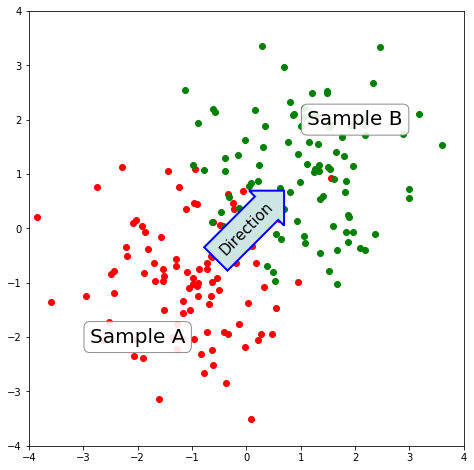

In [2]:
import numpy.random
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(1, figsize=(8,8))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

# 加上两个文本框
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)

# 加上一个箭头文本框
bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.show()

text() 函数接受 bbox 参数来绘制文本框。

bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)

t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)
            
可以这样来获取这个文本框，并对其参数进行修改：

bb = t.get_bbox_patch()

bb.set_boxstyle("rarrow", pad=0.6)

### 常用的文本框风格

In [ ]:
# import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

styles = mpatch.BoxStyle.get_styles()

figheight = (len(styles)+.5)
fig1 = plt.figure(figsize=(4/1.5, figheight/1.5))
fontsize = 0.3 * 72
ax = fig1.add_subplot(111)

for i, (stylename, styleclass) in enumerate(styles.items()):
    ax.text(0.5, (float(len(styles)) - 0.5 - i)/figheight, stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))

# 去掉轴的显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.xticks([])
plt.yticks([])

plt.show()

### 使用箭头进行注释

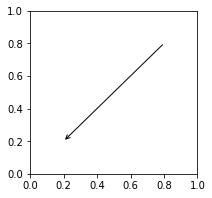

In [4]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.show()

之前介绍了 annotate 中 xy, xycoords, xytext, textcoords 参数的含义，通常我们把 xy 设在 data 坐标系，把 xytext 设在 offset 即以注释点为原点的参考系。

箭头显示是可选的，用 arrowprops 参数来指定，接受一个字典作为参数。

不同类型的绘制箭头方式：

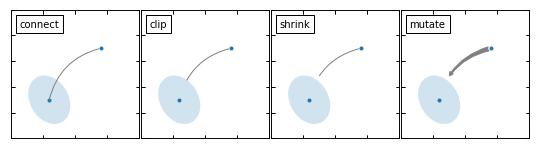

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()